IMPORTING LIBRARIES

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Regular expression operations
import re 

GETTING DATA

In [2]:
test_df=pd.read_csv("test.csv")
train_df=pd.read_csv("train.csv")

DATA EXPLORATION AND DATA ANALYSIS

In [3]:
train_df.info() #gives info on the dataset, how much data and type of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.describe() # describes the features (floats and integers)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head(5)#first 5 entries

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#look at the missing data (see .info() above)

total=train_df.isnull().sum().sort_values(ascending=False) 
#sums null values in each feature and sorts in order of most missing values to least
percent=train_df.isnull().sum()/train_df.isnull().count()*100
#gets the percentage out of the total number of entries in that feature that are null
percent_rounded=(round(percent,1)).sort_values(ascending=False)
#round percentage
missing_data=pd.concat([total,percent_rounded],axis=1,keys=['Total','Percent Missing'])
#create a table with this information, axis=1 represent collumns, axis=0 represent rows
missing_data.head(3) # only need to show first three because rest have no missing data


,Total,Percent Missing
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [7]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
#because the Cabin feature has so many missing values, we will drop it 
#will find a way to fill Age and Embarked missing values 

#Survived is the target variable 

#Expect that PassengerID, Ticket and Name have no correlationw with the target variable 

C:\Users\carol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

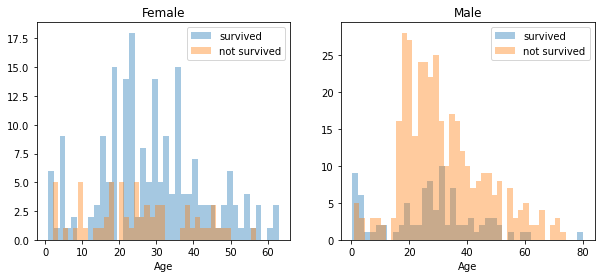

In [9]:
#Explore Age and Sex Variables, knowing that women and children are notoriously prioritized in these kinds of situations 

survived='survived'
not_survived='not survived'
#set variables for the graph labels

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))
#sets characteristics for the two graphs coming below

women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
#make women and men variables the subset of all entries that are women and men

ax=sns.distplot(women[women['Survived']==1].Age.dropna(),bins=40, label=survived,ax=axes[0],kde=False)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(),bins=40, label=not_survived,ax=axes[0],kde=False)
ax.legend()
ax.set_title('Female')
#create graph for women

ax=sns.distplot(men[men['Survived']==1].Age.dropna(),bins=40, label=survived,ax=axes[1],kde=False)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(),bins=40, label=not_survived,ax=axes[1],kde=False)
ax.legend()
ax.set_title('Male')
#create graph for men

In [10]:
#Sex is a very good indicator of whether someone survived, age also seems to indicate

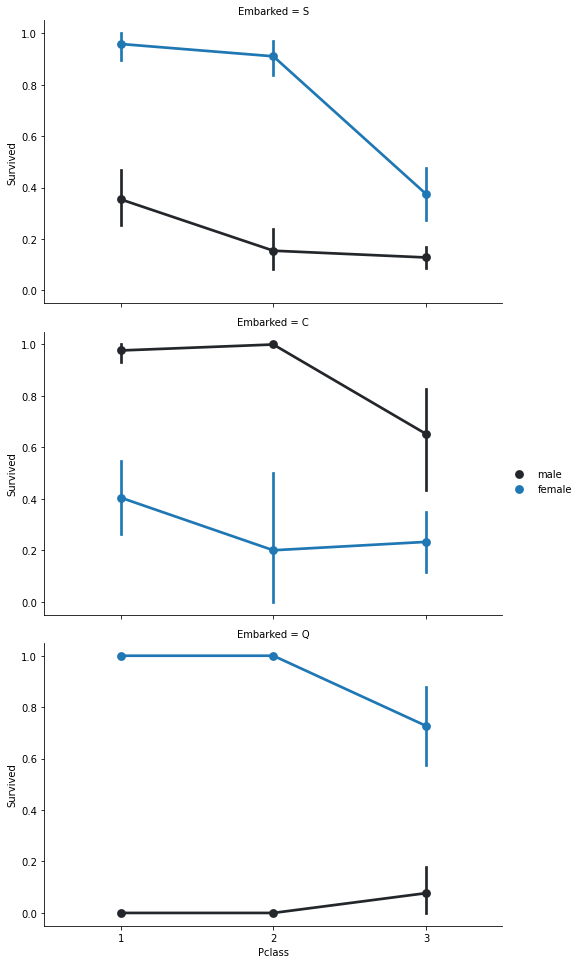

In [11]:
#Explore Embarked, PClass and Sex variables
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()
#FacetGrid is a multigrid plotting for conditional relationships 
#pointplot is the type of plot 

In [12]:
#it seems that women that Embarked on Port Q and S have a higher chance of survival 
#men Embarked on Port C hae a higher probability of survival 
#Pclass also seems to be correlated with survival, 
#Pclass3 seems to have lower survival and Pclass1 seems to have a higher survival

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

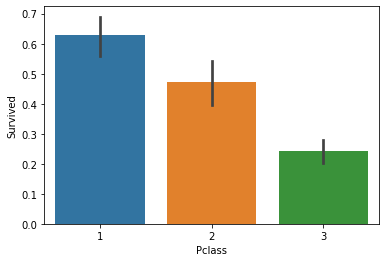

In [13]:
#Explore Pclass further 

sns.barplot(x='Pclass', y='Survived', data=train_df)

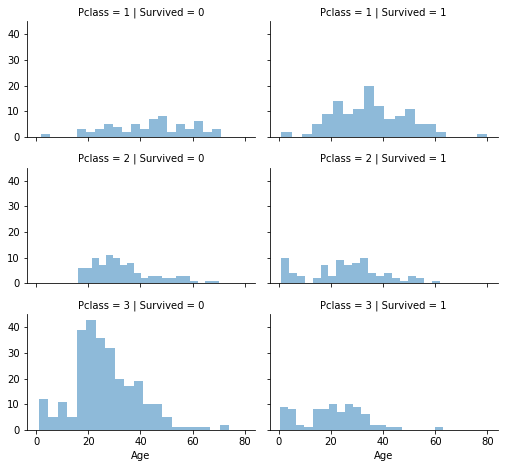

In [14]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();
#FacetGrid again, with histogram plot, shows that Pclass 3 has a veryh low rate of survival

In [15]:
#Using SibSp and Parch to create a new variable, not alone 

data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 1
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 0
    dataset['not_alone'] = dataset['not_alone'].astype(int)

train_df['not_alone'].value_counts()


0    537
1    354
Name: not_alone, dtype: int64

C:\Users\carol\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\carol\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


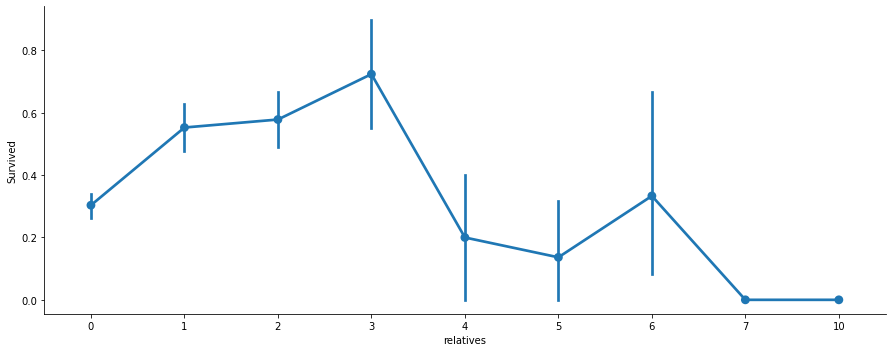

In [16]:
axes = sns.factorplot('relatives','Survived', data=train_df, aspect = 2.5, )

In [17]:
#highest probability of survival at 1,2,3 relatives 

DATA PROCESSING

In [18]:
#Drop Passenger ID as it does not provide useful information
train_df=train_df.drop(['PassengerId'],axis=1)

DATA PROCESSING - DEALING WITH MISSING DATA 
(note, there are no missing values in test_df)

In [19]:
#First, have a look at the Cabin (letter and number, eg. C12), drop number and turn the deck into a numerical value

deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)


In [20]:
#Next, look at missing Age values
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = train_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()

    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)

train_df["Age"].isnull().sum()

0

In [21]:
#Fill in two missing values in Embarked. Sine the value is not numerical, fill in with the most common 

train_df['Embarked'].describe() # most common is S, fill 2 missing with S 

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [22]:
value = 'S'
data = [train_df,test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(value)

In [23]:
#check that all missing values are now filled
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


DATA PROCESSING - CONVERTING DATA TYPES INTO INTEGER

In [24]:
#change float to int FARE
data = [train_df,test_df]

for dataset in data:
    dataset['Fare']=dataset['Fare'].fillna(0)
    dataset['Fare']=dataset['Fare'].astype(int)

In [25]:
#take the relevant part of the name (title) and create a new feature
data = [train_df,test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    #first, remove the titles
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)
    
    #then replace all rarer/uncommon titles into "rare"
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
   
    #then replace french/variations with one of the five titles defined above
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)#titles mapping defined above

    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)

train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

In [26]:
#convert Sex feature into numeric
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [27]:
train_df['Ticket'].describe()
#drop ticket as a feature from train and test as it does not bring any relevant information (unique values)

train_df=train_df.drop(['Ticket'],axis=1)
test_df=test_df.drop(['Ticket'],axis=1)

In [28]:
#convert the Embarked feature into integer
ports_map = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports_map)


In [29]:
data = [train_df, test_df]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int) # convert float to integer
    dataset.loc[ dataset['Age'] <= 13, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 13) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 23), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 23) & (dataset['Age'] <= 28), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 41), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 41) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed 
train_df['Age'].value_counts()

5    159
1    154
6    152
3    142
4    131
2     82
0     71
Name: Age, dtype: int64

In [30]:
train_df['Fare'].describe()

count    891.000000
mean      31.785634
std       49.703730
min        0.000000
25%        7.000000
50%       14.000000
75%       31.000000
max      512.000000
Name: Fare, dtype: float64

C:\Users\carol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fare')

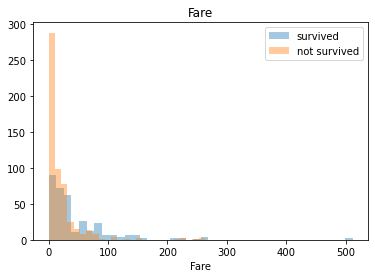

In [31]:
#fare has a very high st dev, mean very different to median, huge range. 
ax=sns.distplot(train_df[train_df['Survived']==1].Fare,bins=40, label=survived,kde=False)
ax=sns.distplot(train_df[train_df['Survived']==0].Fare,bins=25, label=not_survived,kde=False)
ax.legend()
ax.set_title('Fare')

In [32]:
#use qcut to separate the fares into equally spaced values 

pd.qcut(train_df.Fare, 7)


0      (-0.001, 7.0]
1      (56.0, 512.0]
2      (-0.001, 7.0]
3       (27.0, 56.0]
4         (7.0, 8.0]
           ...      
886     (12.0, 19.0]
887     (27.0, 56.0]
888     (19.0, 27.0]
889     (27.0, 56.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (7, interval[float64, right]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 12.0] < (12.0, 19.0] < (19.0, 27.0] < (27.0, 56.0] < (56.0, 512.0]]

In [33]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 12), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 12) & (dataset['Fare'] <= 19), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 19) & (dataset['Fare'] <= 27), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 27) & (dataset['Fare'] <= 56), 'Fare']   = 4
    dataset.loc[(dataset['Fare'] > 56) & (dataset['Fare'] <= 250), 'Fare']   = 5
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 6
    dataset['Fare'] = dataset['Fare'].astype(int)


# let's see how it's distributed 
train_df['Fare'].value_counts()

0    241
1    145
2    129
4    125
3    124
5    118
6      9
Name: Fare, dtype: int64

BUILDING MODELS

In [34]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1)

In [35]:
#Using Random Forrest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [36]:
#Using KNN
knn = KNeighborsClassifier(n_neighbors = 2) 
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [37]:
#Using Perceptron
perceptron = Perceptron(max_iter=8)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [38]:
#Using Decision Tree
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train)  
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [39]:
#Using Linear SVM
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

C:\Users\carol\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [40]:
#Using Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [41]:
#Using Gaussian Naive Bayes
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [42]:
#Using Stochastic Gradient Descent
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

In [43]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
92.26,Random Forest
92.26,Decision Tree
87.65,KNN
81.82,Logistic Regression
81.48,Support Vector Machines
80.92,Perceptron
78.90,Naive Bayes
75.76,Stochastic Gradient Decent
